In [0]:
!pip install tensorflow==2.0.1

In [0]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2.0.1


In [0]:
mnist = tf.keras.datasets.mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train,X_test = X_train/255.0,X_test/255.0

In [0]:
# build the modek
# get input shape by : X_train.shape -->(N,H,W)
model = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape = (28,28)),
     tf.keras.layers.Dense(128,activation='relu'),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(10,activation='softmax')                               
])

In [0]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [0]:
r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2941 - accuracy: 0.9150 - val_loss: 0.1455 - val_accuracy: 0.9569
Epoch 2/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1437 - accuracy: 0.9580 - val_loss: 0.1066 - val_accuracy: 0.9670
Epoch 3/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1063 - accuracy: 0.9673 - val_loss: 0.0818 - val_accuracy: 0.9755
Epoch 4/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0872 - accuracy: 0.9728 - val_loss: 0.0795 - val_accuracy: 0.9746
Epoch 5/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0746 - accuracy: 0.9768 - val_loss: 0.0789 - val_accuracy: 0.9748
Epoch 6/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0649 - accuracy: 0.9794 - val_loss: 0.0715 - val_accuracy: 0.9768
Epoch 7/10
60000/60000 [==============================] 

ERROR! Session/line number was not unique in database. History logging moved to new session 60


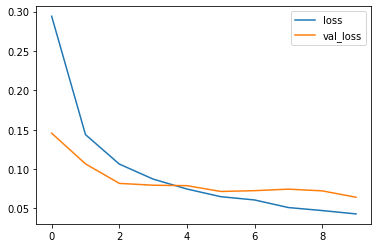

In [0]:
#find loss per iteration
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

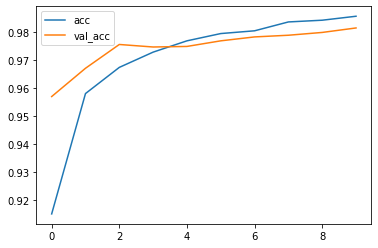

In [0]:
# plot the accuracy per iteration
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [0]:
# evaluate the model
print(model.evaluate(X_test,y_test))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

[[ 968    1    0    1    1    0    2    2    2    3]
 [   0 1125    3    1    0    0    1    0    5    0]
 [   2    2 1011    2    1    0    2    5    7    0]
 [   0    0    3  999    0    1    0    4    1    2]
 [   1    0    3    0  963    0    3    1    2    9]
 [   2    0    0   15    2  864    4    1    3    1]
 [   5    3    1    1    3    3  941    0    1    0]
 [   0    3   10    2    1    0    0 1006    2    4]
 [   2    1    2    6    2    4    1    4  949    3]
 [   0    3    0    2    6    0    0    4    6  988]]


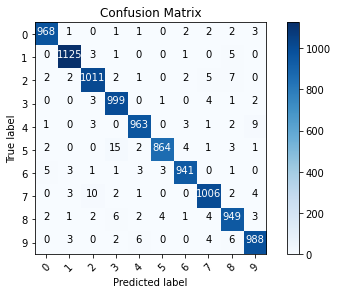

In [0]:
def plot_cm(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  print(cm)
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt = 'd'
  thresh = cm.max() / 2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment = "center",
             color="white" if cm[i,j]>thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_cm(cm,list(range(10)))


In [0]:
cm.max()

1125